In [1]:
import numpy as np
import matplotlib.pyplot as plt

# PCA
Principle Component Analysis

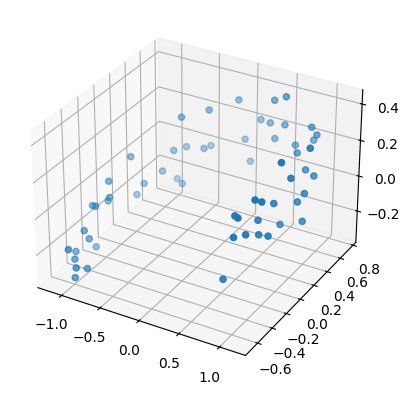

In [10]:
# 3D data
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

## Principle Components

In [15]:
X_centered = X - X.mean(axis=0)
# singular value decomposition
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

## Projecting Down to d Dimensions

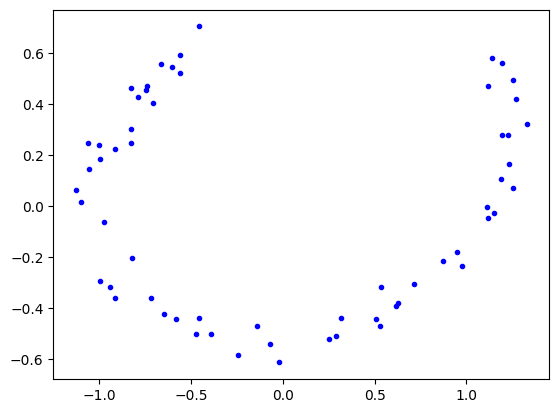

In [28]:
# projecting to the first 2 principle component
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
plt.plot(X2D[:, 0], X2D[:, 1], 'b.')

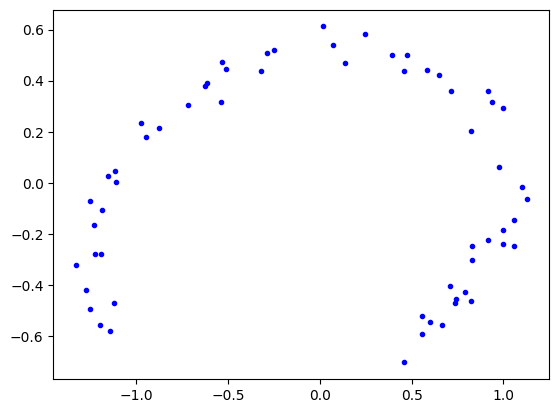

In [34]:
# using Scikit-Learn
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X_centered)
plt.plot(X2D[:, 0], X2D[:, 1], 'b.')

In [35]:
pca.explained_variance_ratio_

array([0.82034476, 0.16896013])

Explained variance ratio tells that 82% of the dataset's variance lies along the first axis, and 17% lies along the second axis. Those two numbers adds up to around 99%, and the reduced dimension only takes up 1% of the variance.

In [53]:
# set the threshold of the proportion of the variance to be 0.95
pca = PCA(n_components=0.95)
X2D = pca.fit_transform(X_centered)

In [54]:
pca.explained_variance_ratio_

array([0.82034476, 0.16896013])